# Utils

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import os
import PIL
from PIL import Image
import pathlib
import pickle

import matplotlib.pyplot as plt

from scipy.stats import uniform, randint
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV

# Load Data & Models

In [69]:
df = pd.read_csv("data/data_pp.csv", index_col=0)

df.head(2)

,Name,Price,Description,Updated,Size,RequiresAndroid,ContentRating,InAppProductsMin,InAppProductsMax,InAppProductsMean,InAppProductsBinary,Target,NumOfWord,AvgNumOfChars,AdventureG,ArcadeG,BoardG,CardG,CasinoG,CasualG,EducationalG,MusicG,PuzzleG,RacingG,RolePlayingG,SimulationG,SportsG,StrategyG,TriviaG,WordG,DigitalPurchasesIE,InAppPurchasesIE,InGamePurchasesIE,SharesInfoIE,SharesLocationIE,UsersInteractIE,LastUpdateDay,LastUpdateWeek,LastUpdateDayLn,OfferedByMeanEnc,BabybusOB,BimiBooKidsLearningGamesForToddlersFzLlcOB,BudgeStudiosOB,ElectronicArtsOB,G5EntertainmentOB,GameloftSeOB,JamCityIncOB,KairosoftOB,MiniclipComOB,OtherOB,YatelandLearningGamesForKidsOB,ZyngaOB,PriceSegment,SizeLn2,Rmean,Gmean,Bmean,Rstd,Gstd,Bstd
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Geometry Dash Lite,0.0,Jump and fly your way through danger in this r...,2019-12-11,58.0,4.0,1,0.00,0.00,0.00,0,35.2,3.0,5.333333,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,900,128.57,6.802395,26.818486,0,0,0,0,0,0,0,0,0,1,0,0,Free,5.857981,109.975656,123.210478,55.596528,117.723707,78.084704,73.268847
1,Fastlane: Road to Revenge,0.0,THEY TOOK YOUR CITY. THEY SHOULD’VE TAKEN YOUR...,2021-08-16,92.0,4.4,2,0.99,99.99,50.49,1,32.2,4.0,5.250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,286,40.86,5.655992,26.818486,0,0,0,0,0,0,0,0,0,1,0,0,Free,6.523562,111.865795,123.851474,104.913302,78.302310,87.087182,76.248771


In [3]:
# load splitted indexes
with open('data/split_dict.pkl', 'rb') as f:
    split_dict = pickle.load(f)

In [4]:
from tensorflow.keras.models import load_model

2023-11-06 00:19:02.776482: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [220]:
# Load the model
pt_mdl = load_model('models/nlp_model_finest.h5') 

In [9]:
# load model dictionary
with open('models/model_dict.pkl', 'rb') as dict_handle:
    model_dict = pickle.load(dict_handle)

# Models

In [10]:
df.head(1)

,Name,Price,Description,Updated,Size,RequiresAndroid,ContentRating,InAppProductsMin,InAppProductsMax,InAppProductsMean,InAppProductsBinary,Target,NumOfWord,AvgNumOfChars,AdventureG,ArcadeG,BoardG,CardG,CasinoG,CasualG,EducationalG,MusicG,PuzzleG,RacingG,RolePlayingG,SimulationG,SportsG,StrategyG,TriviaG,WordG,DigitalPurchasesIE,InAppPurchasesIE,InGamePurchasesIE,SharesInfoIE,SharesLocationIE,UsersInteractIE,LastUpdateDay,LastUpdateWeek,LastUpdateDayLn,OfferedByMeanEnc,BabybusOB,BimiBooKidsLearningGamesForToddlersFzLlcOB,BudgeStudiosOB,ElectronicArtsOB,G5EntertainmentOB,GameloftSeOB,JamCityIncOB,KairosoftOB,MiniclipComOB,OtherOB,YatelandLearningGamesForKidsOB,ZyngaOB,PriceSegment,SizeLn2,Rmean,Gmean,Bmean,Rstd,Gstd,Bstd
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Geometry Dash Lite,0.0,Jump and fly your way through danger in this r...,2019-12-11,58.0,4.0,1,0.0,0.0,0.0,0,35.2,3.0,5.333333,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,900,128.57,6.802395,26.818486,0,0,0,0,0,0,0,0,0,1,0,0,Free,5.857981,109.975656,123.210478,55.596528,117.723707,78.084704,73.268847


## Preparation

In [132]:
class FinalModels:

        def __init__(self, df):
                self.train_ids = split_dict["train"]
                self.test_ids = split_dict["test"]
                self.val_ids = split_dict["val"]
                self.df = df

        # tabular columns
        tb_cols = ["Price","Size","RequiresAndroid",
            "ContentRating","InAppProductsMin","InAppProductsMax",
        #     "InAppProductsMean",
            "InAppProductsBinary",
            "NumOfWord","AvgNumOfChars",
            "LastUpdateWeek",
        #     "LastUpdateLn"
            "SizeLn2"] \
            + [i for i in df.columns if i.endswith("IE")]\
            + [i for i in df.columns if i.endswith("OB")]\
            + [i for i in df.columns if i.endswith("G")]\
            + ["Target"]
# "R_mean","G_mean","B_mean",
# "R_std","G_std","B_std",
        
        target_name= "Target"

        def get_data(self, cols:list):
                Xy_train = self.df.loc[self.train_ids, cols]
                Xy_test = self.df.loc[self.test_ids, cols]
                Xy_val = self.df.loc[self.val_ids, cols]

                X_train = Xy_train.drop(columns=[self.target_name])
                X_test = Xy_test.drop(columns=[self.target_name])
                X_val = Xy_val.drop(columns=[self.target_name])

                y_train = Xy_train[[self.target_name]]
                y_test = Xy_test[[self.target_name]]
                y_val = Xy_val[[self.target_name]]

                # return X_train, X_test, y_train, y_test
                return X_train, X_test, X_val, y_train, y_test, y_val

In [12]:
df.head(2)

,Name,Price,Description,Updated,Size,RequiresAndroid,ContentRating,InAppProductsMin,InAppProductsMax,InAppProductsMean,InAppProductsBinary,Target,NumOfWord,AvgNumOfChars,AdventureG,ArcadeG,BoardG,CardG,CasinoG,CasualG,EducationalG,MusicG,PuzzleG,RacingG,RolePlayingG,SimulationG,SportsG,StrategyG,TriviaG,WordG,DigitalPurchasesIE,InAppPurchasesIE,InGamePurchasesIE,SharesInfoIE,SharesLocationIE,UsersInteractIE,LastUpdateDay,LastUpdateWeek,LastUpdateDayLn,OfferedByMeanEnc,BabybusOB,BimiBooKidsLearningGamesForToddlersFzLlcOB,BudgeStudiosOB,ElectronicArtsOB,G5EntertainmentOB,GameloftSeOB,JamCityIncOB,KairosoftOB,MiniclipComOB,OtherOB,YatelandLearningGamesForKidsOB,ZyngaOB,PriceSegment,SizeLn2,Rmean,Gmean,Bmean,Rstd,Gstd,Bstd
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Geometry Dash Lite,0.0,Jump and fly your way through danger in this r...,2019-12-11,58.0,4.0,1,0.00,0.00,0.00,0,35.2,3.0,5.333333,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,900,128.57,6.802395,26.818486,0,0,0,0,0,0,0,0,0,1,0,0,Free,5.857981,109.975656,123.210478,55.596528,117.723707,78.084704,73.268847
1,Fastlane: Road to Revenge,0.0,THEY TOOK YOUR CITY. THEY SHOULD’VE TAKEN YOUR...,2021-08-16,92.0,4.4,2,0.99,99.99,50.49,1,32.2,4.0,5.250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,286,40.86,5.655992,26.818486,0,0,0,0,0,0,0,0,0,1,0,0,Free,6.523562,111.865795,123.851474,104.913302,78.302310,87.087182,76.248771


### Demonstrating the class

In [133]:
Data = FinalModels(df)

In [134]:
Data.df[Data.tb_cols].head(2)

,Price,Size,RequiresAndroid,ContentRating,InAppProductsMin,InAppProductsMax,InAppProductsBinary,NumOfWord,AvgNumOfChars,LastUpdateWeek,SizeLn2,DigitalPurchasesIE,InAppPurchasesIE,InGamePurchasesIE,SharesInfoIE,SharesLocationIE,UsersInteractIE,BabybusOB,BimiBooKidsLearningGamesForToddlersFzLlcOB,BudgeStudiosOB,ElectronicArtsOB,G5EntertainmentOB,GameloftSeOB,JamCityIncOB,KairosoftOB,MiniclipComOB,OtherOB,YatelandLearningGamesForKidsOB,ZyngaOB,AdventureG,ArcadeG,BoardG,CardG,CasinoG,CasualG,EducationalG,MusicG,PuzzleG,RacingG,RolePlayingG,SimulationG,SportsG,StrategyG,TriviaG,WordG,Target
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,58.0,4.0,1,0.00,0.00,0,3.0,5.333333,128.57,5.857981,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.2
1,0.0,92.0,4.4,2,0.99,99.99,1,4.0,5.250000,40.86,6.523562,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32.2


In [15]:
# Visaualize
corr_matrix = Data.df[Data.tb_cols].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
threshold_corr = 0.5
to_drop = [column for column in upper.columns if any(upper[column] > threshold_corr) or len(pd.unique(Data.df[Data.tb_cols][column])) == 1]	
Data.df[Data.tb_cols][to_drop].corr().style.background_gradient()

/var/folders/_l/048d7_xs4nq8m4g2753wq9bc0000gn/T/ipykernel_17251/2345922365.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,SizeLn2,InGamePurchasesIE
SizeLn2,1.000000,0.165457
InGamePurchasesIE,0.165457,1.000000


### Get Sets

In [135]:
X_train, X_test, X_val, y_train, y_test, y_val = Data.get_data(Data.tb_cols)

In [136]:
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((1543, 45), (592, 45), (355, 45), (1543, 1), (592, 1), (355, 1))

### Scaler

In [137]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler(with_mean=True, with_std=True)

X_train_s = s_scaler.fit_transform(X_train)
X_test_s = s_scaler.transform(X_test)
X_val_s = s_scaler.transform(X_val)

### Creating predefined validation set

In [138]:
from sklearn.model_selection import GridSearchCV, PredefinedSplit

# X_combined = np.vstack((X_train, X_val))
# y_combined = np.hstack((y_train, y_val))

X_comb_s = pd.concat([X_train, X_val], axis=0)
y_comb_s = pd.concat([y_train, y_val], axis=0)

split_index = [-1]*len(X_train) + [0]*len(X_val)
pds = PredefinedSplit(test_fold=split_index)

## Benchmarks

### 1) KNN

In [21]:
from sklearn.neighbors import KNeighborsRegressor

In [22]:
knn_r_grid = {
    "n_neighbors":[5,10,25,50,80,120]
    }

knn_clf = KNeighborsRegressor()
knn_Ser = GridSearchCV(estimator = knn_clf, param_grid= knn_r_grid, 
                       scoring=["neg_mean_squared_error","neg_mean_absolute_percentage_error"], 
                       refit="neg_mean_squared_error", cv = pds, verbose=2, n_jobs = -1)

In [23]:
knn_Ser.fit(X_comb_s, y_comb_s)

Fitting 1 folds for each of 6 candidates, totalling 6 fits


[CV] END .....................................n_neighbors=25; total time=   0.1s
[CV] END .....................................n_neighbors=80; total time=   0.1s
[CV] END .....................................n_neighbors=50; total time=   0.1s
[CV] END ......................................n_neighbors=5; total time=   0.1s
[CV] END .....................................n_neighbors=10; total time=   0.1s
[CV] END ....................................n_neighbors=120; total time=   0.1s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 25, 50, 80, 120]},
             refit='neg_mean_squared_error',
             scoring=['neg_mean_squared_error',
                      'neg_mean_absolute_percentage_error'],
             verbose=2)

In [25]:
knn_cv_scores = (pd.DataFrame(knn_Ser.cv_results_)[["param_n_neighbors","mean_test_neg_mean_absolute_percentage_error"]]).sort_values(by=["mean_test_neg_mean_absolute_percentage_error"], ascending=False)
knn_cv_scores

,param_n_neighbors,mean_test_neg_mean_absolute_percentage_error
5,120,-0.150993
4,80,-0.151407
2,25,-0.151661
3,50,-0.152096
1,10,-0.157759
0,5,-0.160225


### 2) Random Forrest Regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 75, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

criterion = ["squared_error"]
rf_r_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion':criterion,
               'max_samples':uniform(0.7,0.3)}

In [28]:
rf_clf = RandomForestRegressor(n_jobs = -1)
rf_Ser = RandomizedSearchCV(estimator = rf_clf, param_distributions = rf_r_grid, 
                            scoring=["neg_mean_squared_error","neg_mean_absolute_percentage_error"], 
                            refit="neg_mean_squared_error", cv = pds, n_iter = 5, verbose=2, 
                            random_state=42, n_jobs = -1)
rf_Ser.fit(X_comb_s, y_comb_s)

Fitting 1 folds for each of 5 candidates, totalling 5 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=squared_error, max_depth=10, max_features=sqrt, max_samples=0.8834959481464842, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=squared_error, max_depth=16, max_features=sqrt, max_samples=0.9497327922401264, min_samples_leaf=2, min_samples_split=5, n_estimators=555; total time=   1.5s
[CV] END criterion=squared_error, max_depth=49, max_features=sqrt, max_samples=0.7467983561008608, min_samples_leaf=4, min_samples_split=10, n_estimators=822; total time=   2.0s
[CV] END criterion=squared_error, max_depth=49, max_features=sqrt, max_samples=0.9852142919229747, min_samples_leaf=4, min_samples_split=2, n_estimators=555; total time=   1.1s
[CV] END criterion=squared_error, max_depth=36, max_features=sqrt, max_samples=0.7428600453765822, min_samples_leaf=4, min_samples_split=5, n_estimators=555; total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
                   estimator=RandomForestRegressor(n_jobs=-1), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error'],
                                        'max_depth': [10, 16, 23, 29, 36, 42,
                                                      49, 55, 62, 68, 75,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'max_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x13d01bfd0>,
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, refit='neg_mean_squared_error',
                   scoring=['neg_mean_squared_error',
                            'neg_mean_absolute_percentage_error'],
                   verbose=2)

In [29]:
rf_cv_scores = (pd.DataFrame(rf_Ser.cv_results_)[["mean_test_neg_mean_absolute_percentage_error"]])\
.sort_values(by=["mean_test_neg_mean_absolute_percentage_error"], ascending=False)
rf_cv_scores.head()

,mean_test_neg_mean_absolute_percentage_error
3,-0.125061
4,-0.125253
0,-0.126454
2,-0.127138
1,-0.127217


### Neural Network 1
(with only with tabular)

In [30]:
df.head(2)

,Name,Price,Description,Updated,Size,RequiresAndroid,ContentRating,InAppProductsMin,InAppProductsMax,InAppProductsMean,InAppProductsBinary,Target,NumOfWord,AvgNumOfChars,AdventureG,ArcadeG,BoardG,CardG,CasinoG,CasualG,EducationalG,MusicG,PuzzleG,RacingG,RolePlayingG,SimulationG,SportsG,StrategyG,TriviaG,WordG,DigitalPurchasesIE,InAppPurchasesIE,InGamePurchasesIE,SharesInfoIE,SharesLocationIE,UsersInteractIE,LastUpdateDay,LastUpdateWeek,LastUpdateDayLn,OfferedByMeanEnc,BabybusOB,BimiBooKidsLearningGamesForToddlersFzLlcOB,BudgeStudiosOB,ElectronicArtsOB,G5EntertainmentOB,GameloftSeOB,JamCityIncOB,KairosoftOB,MiniclipComOB,OtherOB,YatelandLearningGamesForKidsOB,ZyngaOB,PriceSegment,SizeLn2,Rmean,Gmean,Bmean,Rstd,Gstd,Bstd
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Geometry Dash Lite,0.0,Jump and fly your way through danger in this r...,2019-12-11,58.0,4.0,1,0.00,0.00,0.00,0,35.2,3.0,5.333333,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,900,128.57,6.802395,26.818486,0,0,0,0,0,0,0,0,0,1,0,0,Free,5.857981,109.975656,123.210478,55.596528,117.723707,78.084704,73.268847
1,Fastlane: Road to Revenge,0.0,THEY TOOK YOUR CITY. THEY SHOULD’VE TAKEN YOUR...,2021-08-16,92.0,4.4,2,0.99,99.99,50.49,1,32.2,4.0,5.250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,286,40.86,5.655992,26.818486,0,0,0,0,0,0,0,0,0,1,0,0,Free,6.523562,111.865795,123.851474,104.913302,78.302310,87.087182,76.248771


#### Model Creation

In [31]:
from tensorflow import keras
from tensorflow import nn
from tensorflow.keras import regularizers

In [32]:
Input_ = keras.Input(shape=(X_train_s.shape[1],),name="Input Layer")
Hidden1_ = keras.layers.Dense(32, activation=keras.activations.relu, name="Hidden_Layer_1",
                              kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4))(Input_)
Dropout1_ = keras.layers.Dropout(0.3)(Hidden1_)
Hidden2_ = keras.layers.Dense(32, activation=keras.activations.relu, name="Hidden_Layer_2",
                              kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4))(Dropout1_)
Dropout2_ = keras.layers.Dropout(0.3)(Hidden2_)
Output_ = keras.layers.Dense(1, activation=keras.activations.linear, name="Output")(Dropout2_)
ann_clf = keras.Model(inputs=[Input_], outputs=[Output_])
ann_clf.summary()

ann_clf.compile(optimizer=keras.optimizers.Adam(), loss = keras.losses.MeanSquaredError() , 
metrics=[keras.metrics.MeanAbsolutePercentageError()])

early_stop = keras.callbacks.EarlyStopping(monitor="val_loss",patience=15)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Layer (InputLayer)    [(None, 45)]              0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 32)                1472      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 Hidden_Layer_2 (Dense)      (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable par

In [33]:
history_ann = ann_clf.fit(X_train_s, y_train,epochs=200,validation_data=(X_val_s, y_val),
verbose=2,callbacks=[early_stop],batch_size=32, 
)

Epoch 1/200
49/49 - 1s - loss: 619.9975 - mean_absolute_percentage_error: 89.6762 - val_loss: 527.6718 - val_mean_absolute_percentage_error: 80.4429 - 1s/epoch - 30ms/step
Epoch 2/200
49/49 - 0s - loss: 372.5341 - mean_absolute_percentage_error: 65.8003 - val_loss: 368.1136 - val_mean_absolute_percentage_error: 48.8587 - 164ms/epoch - 3ms/step
Epoch 3/200
49/49 - 0s - loss: 142.1931 - mean_absolute_percentage_error: 36.6089 - val_loss: 336.7553 - val_mean_absolute_percentage_error: 27.6949 - 114ms/epoch - 2ms/step
Epoch 4/200
49/49 - 0s - loss: 85.5375 - mean_absolute_percentage_error: 27.9334 - val_loss: 279.8781 - val_mean_absolute_percentage_error: 22.2582 - 86ms/epoch - 2ms/step
Epoch 5/200
49/49 - 0s - loss: 74.8574 - mean_absolute_percentage_error: 26.2726 - val_loss: 211.3365 - val_mean_absolute_percentage_error: 20.7234 - 267ms/epoch - 5ms/step
Epoch 6/200
49/49 - 0s - loss: 67.9134 - mean_absolute_percentage_error: 25.4665 - val_loss: 188.6473 - val_mean_absolute_percentage_er

#### Plot

In [34]:
import seaborn as sns

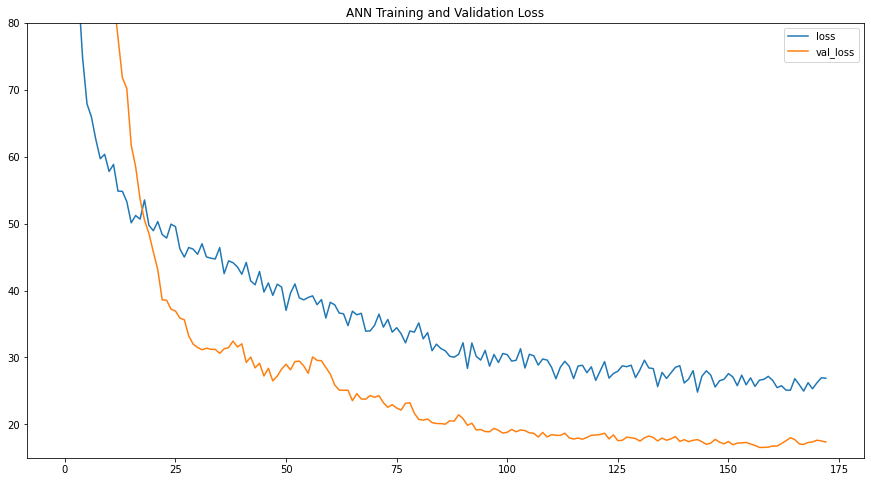

In [35]:
plt.figure(figsize=(15,8))
history_df = pd.DataFrame(history_ann.history)
sns.lineplot(data=history_df[["loss","val_loss"]],dashes=False)
# plt.scatter(len(history_df) , mse_dnn, marker="o",color = "r")
# plt.xlim(-2,50)
plt.title("ANN Training and Validation Loss")
plt.ylim(15,80)
plt.show()

### Neural Network 2 
(with Pre-trained)

In [221]:
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout
from keras.models import Model

Removing the last layer from pre-trained model and freezing the weights except the last layer. 

In [222]:
layer_output = pt_mdl.layers[-2].output
pt_mdl_modif = Model(inputs=pt_mdl.input, outputs=layer_output)

for layer in pt_mdl_modif.layers[:-4]:
    layer.trainable = False

In [223]:
pt_mdl_modif.summary()

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 300)]             0         
                                                                 
 Embedding (Embedding)       (None, 300, 100)          1000000   
                                                                 
 dropout_40 (Dropout)        (None, 300, 100)          0         
                                                                 
 lstm_12 (LSTM)              (None, 300, 96)           75648     
                                                                 
 dropout_41 (Dropout)        (None, 300, 96)           0         
                                                                 
 global_average_pooling1d (G  (None, 96)               0         
 lobalAveragePooling1D)                                          
                                                          

In [224]:
from tensorflow.keras.optimizers import Adam

nlp_output = pt_mdl_modif.output

tabular_input = Input(shape=(X_train_s.shape[1],), name='tabular_input')
Hidden2 = keras.layers.Dense(64, activation=keras.activations.relu, name="Hidden_Layer_2",
                              kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4))(tabular_input)
Dropout2 = keras.layers.Dropout(0.4)(Hidden2)

combined_input = Concatenate()([nlp_output, Dropout2])

combined_dense = Dense(64, activation='relu',
                       kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4))(combined_input)
combined_dropout = Dropout(0.65)(combined_dense)

final_output = Dense(1, name='final_output')(combined_dropout)

combined_model = Model(inputs=[pt_mdl_modif.input, tabular_input], outputs=final_output)
combined_model.summary()

combined_model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mean_absolute_percentage_error'])

Model: "model_24"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 300)]        0           []                               
                                                                                                  
 Embedding (Embedding)          (None, 300, 100)     1000000     ['input_11[0][0]']               
                                                                                                  
 dropout_40 (Dropout)           (None, 300, 100)     0           ['Embedding[0][0]']              
                                                                                                  
 lstm_12 (LSTM)                 (None, 300, 96)      75648       ['dropout_40[0][0]']             
                                                                                           

Total params: 1,280,193
Trainable params: 204,545
Non-trainable params: 1,075,648
__________________________________________________________________________________________________


In [211]:
from tensorflow.keras.callbacks import EarlyStopping

es_cb = EarlyStopping(patience=10, 
                   monitor='val_loss', 
                   restore_best_weights=True, 
                   mode='min', 
                   verbose=1)

In [184]:
history = combined_model.fit(
    [model_dict['padded']["train"], X_train_s], y_train,
    validation_data=([model_dict['padded']["val"], X_val_s], y_val),
    epochs=200,
    batch_size=16,
    callbacks=[es_cb]
)

Epoch 1/200
97/97 [==============================] - 8s 41ms/step - loss: 176.7483 - mean_absolute_percentage_error: 39.3925 - val_loss: 29.2864 - val_mean_absolute_percentage_error: 16.8622
Epoch 2/200
97/97 [==============================] - 4s 36ms/step - loss: 68.2555 - mean_absolute_percentage_error: 24.3021 - val_loss: 35.3535 - val_mean_absolute_percentage_error: 17.9397
Epoch 3/200
97/97 [==============================] - 3s 36ms/step - loss: 63.1560 - mean_absolute_percentage_error: 23.2070 - val_loss: 30.3076 - val_mean_absolute_percentage_error: 16.8920
Epoch 4/200
97/97 [==============================] - 3s 34ms/step - loss: 56.7745 - mean_absolute_percentage_error: 22.6934 - val_loss: 29.0619 - val_mean_absolute_percentage_error: 16.5556
Epoch 5/200
97/97 [==============================] - 3s 35ms/step - loss: 61.1862 - mean_absolute_percentage_error: 22.8748 - val_loss: 30.0723 - val_mean_absolute_percentage_error: 16.7622
Epoch 6/200
97/97 [==============================

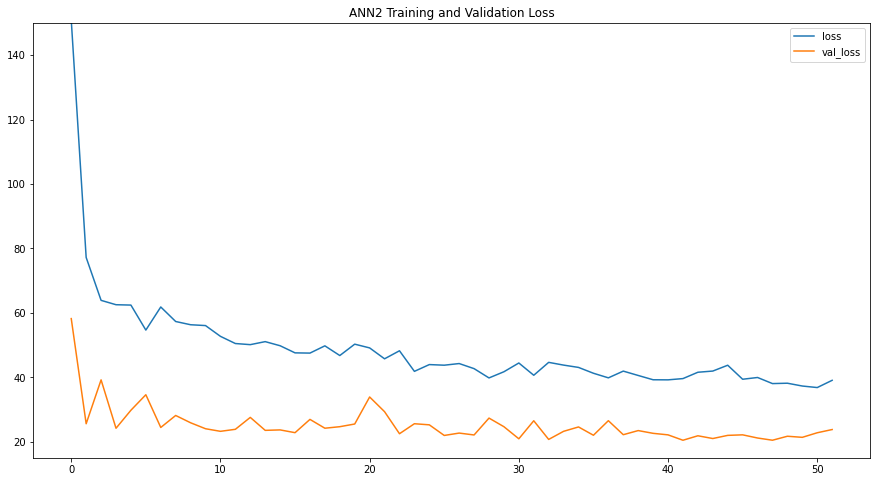

In [200]:
plt.figure(figsize=(15,8))
history_df2 = pd.DataFrame(history.history)
sns.lineplot(data=history_df2[["loss","val_loss"]],dashes=False)
plt.title("ANN2 Training and Validation Loss")
plt.ylim(15,150)
plt.show()

# Evaluation

In [216]:
# mape, mae, mse
def eval(y_true, y_pred):
    mape = np.round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)
    mae = np.round(np.mean(np.abs(y_true - y_pred)), 2)
    mse = np.round(np.mean((y_true - y_pred)**2), 2)
    eval = np.array([mape, mae, mse])
    return eval


In [217]:
models=["KNN", "RF", "ANN1", "ANN2"]
eval_metrics = ["Test MAPE","Test MAE", "Test MSE"]
results = pd.DataFrame(index=models,columns=eval_metrics)

In [218]:
results.loc["KNN",:] = eval(y_test, knn_Ser.predict(X_test_s)).flatten()
results.loc["RF",:] = eval(y_test, rf_Ser.predict(X_test_s).reshape(-1,1)).flatten()
results.loc["ANN1",:] = eval(y_test, ann_clf.predict(X_test_s)).flatten()
results.loc["ANN2",:] = eval(y_test, combined_model.predict([model_dict['padded']["test"], X_test_s])).flatten()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


19/19 [==============================] - 0s 1ms/step


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


19/19 [==============================] - 2s 49ms/step


In [181]:
results

,Test MAPE,Test MAE,Test MSE
KNN,15.89,3.97,24.28
RF,14.39,3.55,19.71
ANN1,12.46,3.06,14.96
ANN2,14.39,3.73,21.93


# Final Comments